In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load and prepare data

In [141]:
#the dataset can be downloaded from:
#https://www.kaggle.com/ntnu-testimon/paysim1/downloads/PS_20174392719_1491204439457_log.csv
#it will be easier to download it first (not using pandas)
data = pd.read_csv("https://www.kaggle.com/ntnu-testimon/paysim1/downloads/PS_20174392719_1491204439457_log.csv")

In [3]:
data.columns.values

array(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg',
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud'], dtype=object)

Here is the explanation about each feature from the site (it is copied as is):

****

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

****


#### Notes:

In this analysis, only numerical features will be included and feature 'isFraud' as target. Because fraud transaction only occured in 'type' CASH_OUT AND TRANSFER, the data is filtered based on those type values.

In [14]:
data = data[data['type'].isin(['CASH_OUT', 'TRANSFER'])]
data = data.drop(['step','type','nameOrig','nameDest', 'isFlaggedFraud'], axis=1)

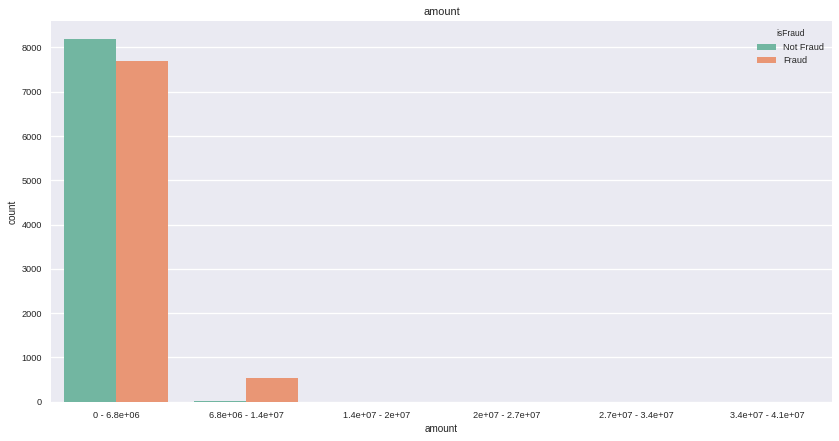

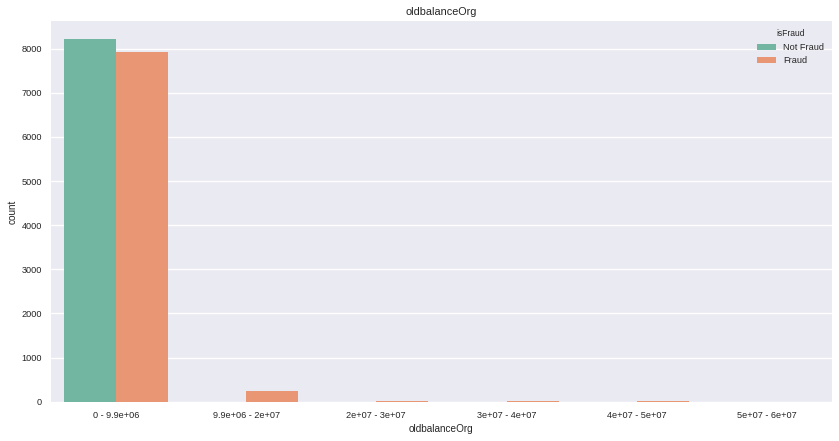

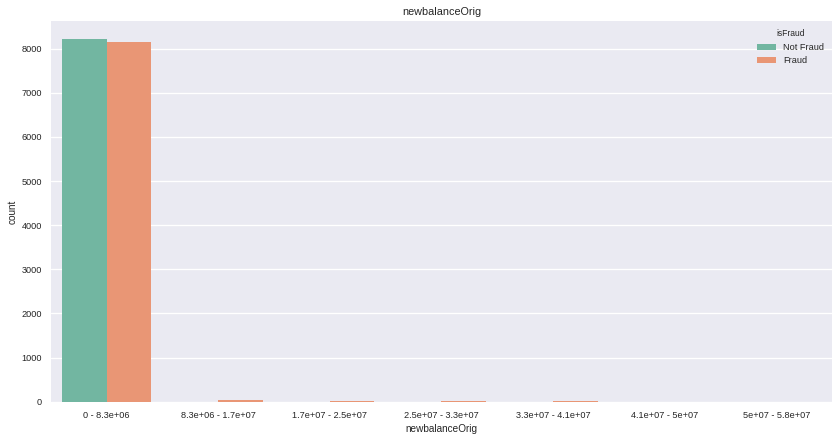

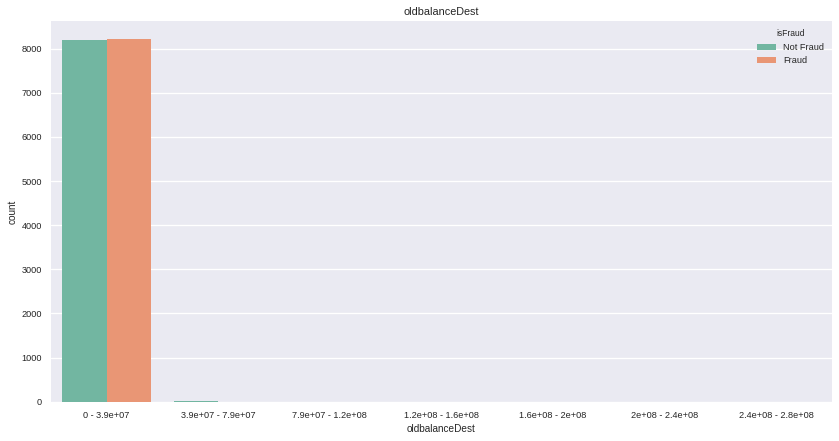

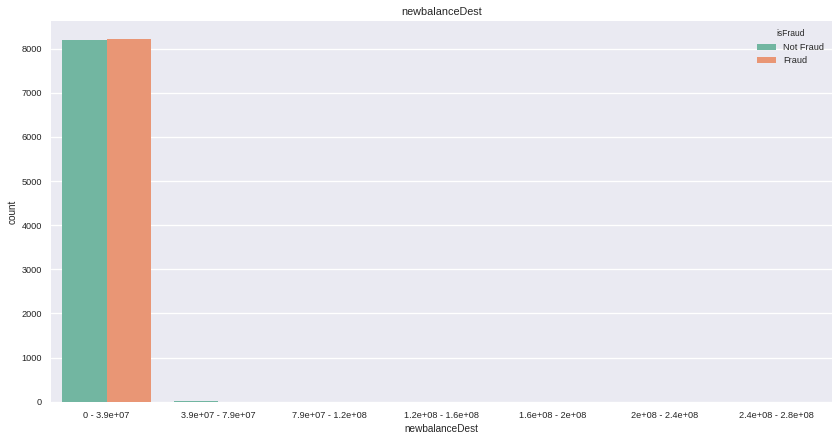

In [15]:
data_fraud = data[data['isFraud']==1]
data_normal = data[data['isFraud']==0]
data_normal = data_normal.sample(n=data_fraud.shape[0], axis=0)
data = pd.concat((data_normal, data_fraud), axis=0)
data = data.replace({'isFraud':{1:'Fraud',0:'Not Fraud'}})
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 2.5})
for c in data.columns.values:
    if c!='isFraud':
        min_ = int(data[c].min())
        max_ = int(data[c].max())
        range_ = int((max_-min_)/6)
        bins_ = range(min_, max_+range_, range_)
        labels = [ "%0.2g - %0.2g"%(i, i + range_) for i in range(min_, max_, range_) ]
        data[c] = pd.cut(data[c], bins=bins_, right=False, labels=labels)
        plt.figure(figsize=(14,7))
        sns.countplot(x=c, hue="isFraud", data=data, palette="Set2")
        plt.title(c)
        plt.show()

## Analysis

The diagram shows:
1. The amount of fraudulent transaction is much larger compare to the normal one. Compare to normal transaction, the occurence of fraudulent transaction is much higher when the amount is larger than 6800000. This number is influenced by the choice of binning parameter. For the purpose of readabilty, I choose bins=6. It would be finer if the chosen bins is larger than that number. In the dataset description itself, a transaction is flagged as fraudulent when the amount larger than 200000.
2. In the fraudulent transaction, the initial balance of the senders (owners account) are larger than initial account of normal transaction (the target of the fraudulent is account with high balance?)
3. Some of initial balance of the recipients in the normal transaction is larger than initial balance of the fraudulent recipients.
